In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train_trans=pd.read_csv("train_transaction.csv")
train_trans.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
test_trans=pd.read_csv("test_transaction.csv")
test_trans.head()

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,3663549,18403224,31.95,W,10409,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3663550,18403263,49.00,W,4272,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3663551,18403310,171.00,W,4476,574.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3663552,18403310,284.95,W,10989,360.0,150.0,visa,166.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3663553,18403317,67.95,W,18018,452.0,150.0,mastercard,117.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
train_iden = pd.read_csv('train_identity.csv')
train_iden.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [5]:
test_iden = pd.read_csv('test_identity.csv')
test_iden.head()

,TransactionID,id-01,id-02,id-03,id-04,id-05,id-06,id-07,id-08,id-09,...,id-31,id-32,id-33,id-34,id-35,id-36,id-37,id-38,DeviceType,DeviceInfo
0,3663586,-45.0,280290.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,...,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,MYA-L13 Build/HUAWEIMYA-L13
1,3663588,0.0,3579.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 67.0 for android,24.0,1280x720,match_status:2,T,F,T,T,mobile,LGLS676 Build/MXB48T
2,3663597,-5.0,185210.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,...,ie 11.0 for tablet,NaN,NaN,NaN,F,T,T,F,desktop,Trident/7.0
3,3663601,-45.0,252944.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,MYA-L13 Build/HUAWEIMYA-L13
4,3663602,-95.0,328680.0,NaN,NaN,7.0,-33.0,NaN,NaN,NaN,...,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,SM-G9650 Build/R16NW


In [6]:
#df_train = df_train_transaction.merge(df_train_identity,on=['TransactionID'],how='left')
train_set = pd.merge(train_trans, train_iden, how='left')
train_set.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


<AxesSubplot:>

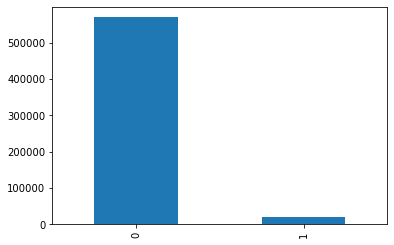

In [7]:
train_set['isFraud'].value_counts().plot.bar()

In [8]:
#Rename the id-x column in test set to id_x
id_num = [i for i in test_iden.columns if i[0]+i[1] == 'id']
rename_id = {i:'id_'+str(i[-2]+i[-1]) for i in id_num}
test_iden = test_iden.rename(columns=rename_id)
test_set = test_trans.merge(test_iden,on=['TransactionID'],how='left')
#test_set = pd.merge(test_trans, test_iden, how='left')
test_set.head()

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,3663549,18403224,31.95,W,10409,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3663550,18403263,49.00,W,4272,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3663551,18403310,171.00,W,4476,574.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3663552,18403310,284.95,W,10989,360.0,150.0,visa,166.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3663553,18403317,67.95,W,18018,452.0,150.0,mastercard,117.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#See the missing rate for each column in train set
train_col = train_set.columns

for col in train_col:
    if col != 'isFraud':
        df = pd.concat([train_set[col],test_set[col]],axis=0)
        missing = round((df.isnull().sum()/df.shape[0])*100,2)
        print(f'missing rate for {col} is {missing}%')

missing percent for TransactionID is 0.0%
missing percent for TransactionDT is 0.0%
missing percent for TransactionAmt is 0.0%
missing percent for ProductCD is 0.0%
missing percent for card1 is 0.0%
missing percent for card2 is 1.6%
missing percent for card3 is 0.42%
missing percent for card4 is 0.42%
missing percent for card5 is 0.8%
missing percent for card6 is 0.42%
missing percent for addr1 is 11.97%
missing percent for addr2 is 11.97%
missing percent for dist1 is 58.65%
missing percent for dist2 is 93.25%
missing percent for P_emaildomain is 14.91%
missing percent for R_emaildomain is 75.1%
missing percent for C1 is 0.0%
missing percent for C2 is 0.0%
missing percent for C3 is 0.0%
missing percent for C4 is 0.0%
missing percent for C5 is 0.0%
missing percent for C6 is 0.0%
missing percent for C7 is 0.0%
missing percent for C8 is 0.0%
missing percent for C9 is 0.0%
missing percent for C10 is 0.0%
missing percent for C11 is 0.0%
missing percent for C12 is 0.0%
missing percent for C1

missing percent for V194 is 74.83%
missing percent for V195 is 74.83%
missing percent for V196 is 74.81%
missing percent for V197 is 74.83%
missing percent for V198 is 74.83%
missing percent for V199 is 74.81%
missing percent for V200 is 74.83%
missing percent for V201 is 74.83%
missing percent for V202 is 74.81%
missing percent for V203 is 74.81%
missing percent for V204 is 74.81%
missing percent for V205 is 74.81%
missing percent for V206 is 74.81%
missing percent for V207 is 74.81%
missing percent for V208 is 74.83%
missing percent for V209 is 74.83%
missing percent for V210 is 74.83%
missing percent for V211 is 74.81%
missing percent for V212 is 74.81%
missing percent for V213 is 74.81%
missing percent for V214 is 74.81%
missing percent for V215 is 74.81%
missing percent for V216 is 74.81%
missing percent for V217 is 76.56%
missing percent for V218 is 76.56%
missing percent for V219 is 76.56%
missing percent for V220 is 74.6%
missing percent for V221 is 74.6%
missing percent for V2

In [3]:
#All columns
cat_cols = (['ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 
             'addr1', 'addr2', 
             'P_emaildomain', 'R_emaildomain', 
             'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 
             'DeviceType', 'DeviceInfo', 
             'id_12', 'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 'id_29', 'id_30', 'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38'])

In [8]:
type_map = {c: str for c in cat_cols}
print(type_map)

{'ProductCD': <class 'str'>, 'card1': <class 'str'>, 'card2': <class 'str'>, 'card3': <class 'str'>, 'card4': <class 'str'>, 'card5': <class 'str'>, 'card6': <class 'str'>, 'addr1': <class 'str'>, 'addr2': <class 'str'>, 'P_emaildomain': <class 'str'>, 'R_emaildomain': <class 'str'>, 'M1': <class 'str'>, 'M2': <class 'str'>, 'M3': <class 'str'>, 'M4': <class 'str'>, 'M5': <class 'str'>, 'M6': <class 'str'>, 'M7': <class 'str'>, 'M8': <class 'str'>, 'M9': <class 'str'>, 'DeviceType': <class 'str'>, 'DeviceInfo': <class 'str'>, 'id_12': <class 'str'>, 'id_13': <class 'str'>, 'id_14': <class 'str'>, 'id_15': <class 'str'>, 'id_16': <class 'str'>, 'id_17': <class 'str'>, 'id_18': <class 'str'>, 'id_19': <class 'str'>, 'id_20': <class 'str'>, 'id_21': <class 'str'>, 'id_22': <class 'str'>, 'id_23': <class 'str'>, 'id_24': <class 'str'>, 'id_25': <class 'str'>, 'id_26': <class 'str'>, 'id_27': <class 'str'>, 'id_28': <class 'str'>, 'id_29': <class 'str'>, 'id_30': <class 'str'>, 'id_31': <cl

In [13]:
train_set[cat_cols] = train_set[cat_cols].astype(type_map, copy=False)

In [14]:
test_set[cat_cols] = test_set[cat_cols].astype(type_map, copy=False)

In [15]:
id_cols = ['TransactionID', 'TransactionDT']

In [16]:
y_train_ = train_set['isFraud']
X_train = train_set.drop(columns=['isFraud'])
X_test = test_set.copy()

In [17]:
print(X_train.shape)
print(X_test.shape)

(590540, 433)
(506691, 433)


In [18]:
for col in X_train.columns:
    if col in cat_cols:
        # label encode all cat columns
        dff = pd.concat([X_train[col],X_test[col]])
        dff,_ = pd.factorize(dff,sort=True)
        if dff.max()>32000: 
            print(col,'needs int32 datatype')
            
        X_train[col] = dff[:len(X_train)].astype('int16')
        X_test[col] = dff[len(X_train):].astype('int16')

In [19]:
cols = X_train.columns
for col in cols:
    if col not in cat_cols and col not in id_cols:
        # min max scalar
        dff = pd.concat([X_train[col],X_test[col]])
        dff = (dff - dff.min())/(dff.max() - dff.min())
        dff.fillna(-1,inplace=True)

        X_train[col] = dff[:len(X_train)]
        X_test[col] = dff[len(X_train):]

In [20]:
idx_train = X_train.index[:int(X_train.shape[0]*0.75)]  

In [21]:
idx_validation = X_train.index[int(X_train.shape[0]*0.75):]

In [22]:
x_train,y_train = X_train.iloc[idx_train],y_train_.iloc[idx_train]

In [23]:
x_cv_,y_cv = X_train.iloc[idx_validation],y_train_.iloc[idx_validation]

In [24]:
print(x_train.shape)
print(x_cv_.shape)
print(y_train.shape)
print(y_cv.shape)

(442905, 433)
(147635, 433)
(442905,)
(147635,)


In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
model = RandomForestClassifier()

In [27]:
model.fit(x_train,y_train)

RandomForestClassifier()

In [28]:
y_train_pred = model.predict(x_train)

In [29]:
y_test_pred = model.predict(x_cv_)

In [36]:
from sklearn.metrics import roc_curve, auc, confusion_matrix


In [32]:
train_fpr, train_tpr, thresholds = roc_curve(y_train, model.predict_proba(x_train)[:,1])

In [33]:
test_fpr, test_tpr, thresholds = roc_curve(y_cv, model.predict_proba(x_cv_)[:,1])

In [35]:
print('Area under train roc {}'.format(auc(train_fpr, train_tpr)))
print('Area under test roc {}'.format(auc(test_fpr, test_tpr)))

Area under train roc 1.0
Area under test roc 0.8772793452175833


In [38]:
import seaborn as sns

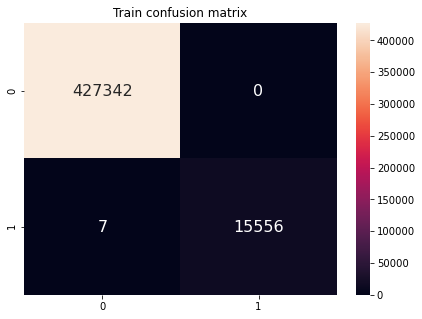

In [39]:
train_cf = confusion_matrix(y_train,y_train_pred)
plt.figure(figsize=(7,5))
sns.heatmap(train_cf,annot=True,annot_kws={"size": 16},fmt="0")
plt.title('Train confusion matrix')
plt.show()

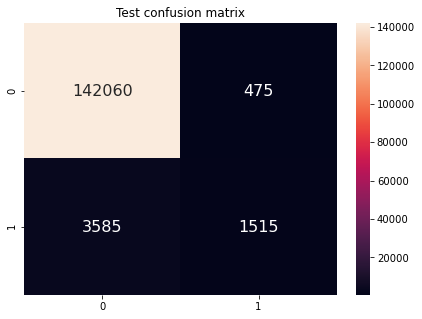

In [40]:
cv_cf = confusion_matrix(y_cv,y_test_pred)
plt.figure(figsize=(7,5))
sns.heatmap(cv_cf,annot=True,annot_kws={"size": 16},fmt="0")
plt.title('Test confusion matrix')
plt.show()